In [6]:
import warnings
warnings.filterwarnings('ignore')
import torch
import os
from pprint import pprint
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool

from langchain_core.utils.function_calling import convert_to_openai_function
from langchain_openai import ChatOpenAI

from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent

import tool_pool as tp

dotenv_path = '/Users/minkyuramen/Desktop/project/env'
load_dotenv(dotenv_path)

api_key = os.getenv("SEMANTIC_SCHOLAR_API_KEY")
openai_key = os.getenv("OPENAI_API_KEY")

In [7]:
# load model
model = ChatOpenAI(model="gpt-3.5-turbo")
# load tool
tools = [tp.loadpaper, tp.recommendpaper, tp.loadfigure]
# load Agent prompt
prompt = hub.pull("hwchase17/openai-tools-agent")

In [8]:
# Choose the LLM that will drive the agent
# Only certain models support this
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Construct the OpenAI Tools agent
agent = create_openai_tools_agent(llm, tools, prompt)
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# loadpaper

In [15]:
output = agent_executor.invoke({"input": "explain about the math expression about the Filtering api calls in the 3 page of the paper 'Language Models Can Teach Themselves to Use Tools' 한글로 말해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'query': 'Language Models Can Teach Themselves to Use Tools', 'start_page': 3}`


### Searched Paper ###
Title: Toolformer: Language Models Can Teach Themselves to Use Tools
Authors: Thomas Scialom
Published: 2023-02-09T16:49:57Z
ID: 2302.04761v1
File ./papers_db/2302.04761v1.pdf already exists. Skipping download.
Page limit reached at 4
Your task is to add calls to a Question Answering API to a piece of text. The questions should help you get information required to complete the text. You can call the API by writing "[QA(question)]" where "question" is the question you want to ask. Here are some examples of API calls: Input: Joe Biden was born in Scranton, Pennsylvania. Output: Joe Biden was born in [QA("Where was Joe Biden born?")] Scranton, [QA("In which state is Scranton?")] Pennsylvania. Input: Coca-Cola, or Coke, is a carbonated soft drink manufactured by the Coca-Cola Company. Output: Coca-Cola, or [QA("What o

In [16]:
pprint(output['output'])

('필터링 API 호출에 대한 수학 표현은 다음과 같습니다:\n'
 '\n'
 '주어진 수식에서, i는 API 호출 ci의 위치를 나타내고, ri는 API의 응답을 나타냅니다. 또한, 가중치의 시퀀스 (wi, i는 '
 '자연수)가 주어졌을 때, Li(z) = Σ(j=i)^(n) wj * log p_M(x_j | z; x_1:j-1)는 모델 M에 대한 가중 '
 '교차 엔트로피 손실을 나타냅니다. 여기서 z는 모델이 주어진 경우입니다.\n'
 '\n'
 '우리는 이 손실의 두 가지 다른 인스턴스를 비교합니다:\n'
 '- L^+_i = Li(e(ci, ri))\n'
 '- L^-_i = min(Li(""), Li(e(ci, ri)))\n'
 '\n'
 '여기서 ""는 빈 시퀀스를 나타냅니다. 전자는 API 호출과 해당 결과가 모델에 주어진 경우의 모든 토큰 xi부터 xn까지의 가중 '
 '손실입니다. 후자는 (i) 전혀 API 호출을 하지 않는 경우와 (ii) API 호출을 하지만 결과를 제공하지 않는 경우에서 얻은 손실의 '
 '최솟값입니다.\n'
 '\n'
 '직관적으로, API 호출은 모델이 미래 토큰을 예측하는 데 도움이 되는 경우입니다. 즉, API 호출과 해당 결과를 제공하는 것이 전혀 '
 'API 호출을 하지 않는 것이나 결과를 얻지 못하는 것보다 모델이 미래 토큰을 예측하는 데 더 쉽게 만드는 경우에 해당합니다.\n'
 '\n'
 '마지막으로, 필터링 임계값 f가 주어지면, 손실이 f 이상 감소하는 API 호출만 유지됩니다. 즉, API 호출과 해당 결과를 추가하면 '
 '손실이 f 이상 감소하므로, 전혀 API 호출을 하지 않거나 결과를 얻지 못하는 것보다 더 나은 경우에 해당합니다.')


In [7]:
output = agent_executor.invoke({"input": "summary the method of the paper 'Large Language Model Connected with Massive APIs' 한글로 말해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'query': 'Large Language Model Connected with Massive APIs', 'start_page': 1}`


### Searched Paper ###
Title: Gorilla: Large Language Model Connected with Massive APIs
Authors: ['Shishir G. Patil', 'Tianjun Zhang', 'Xin Wang', 'Joseph E. Gonzalez']
Published: 2023-05-24
{'paperId': '7d8905a1fd288068f12c8347caeabefd36d0dd6c', 'externalIds': {'DBLP': 'journals/corr/abs-2305-15334', 'ArXiv': '2305.15334', 'DOI': '10.48550/arXiv.2305.15334', 'CorpusId': 258865184}}
ArXiv_id: 2305.15334
File ./papers_db/2305.15334.pdf already exists. Skipping download.
Page limit reached at 4
Gorilla: Large Language Model Connected with Massive APIs Shishir G. Patil1∗Tianjun Zhang1,∗Xin Wang2Joseph E. Gonzalez1 1UC Berkeley2Microsoft Research sgp@berkeley.edu Abstract Large Language Models (LLMs) have seen an impressive wave of advances re- cently, with models now excelling in a variety of tasks, such as mathematical reasoning and progra

In [8]:
pprint(output['output'])

("'Large Language Model Connected with Massive APIs' 논문의 메소드를 요약하면 다음과 같습니다:\n"
 '\n'
 '- Gorilla 모델을 소개하며, 이 모델은 GPT-4보다 API 호출 작성 성능이 우수하다.\n'
 '- Gorilla는 문서 검색기와 결합하여 테스트 시간 문서 변경에 적응하는 강력한 능력을 보여준다.\n'
 '- Hallucination 문제를 크게 완화시키며, 직접 LLMs에 프롬프팅할 때 흔히 발생하는 문제를 줄인다.\n'
 '- APIBench라는 포괄적인 데이터셋을 소개하며, HuggingFace, TorchHub 및 TensorHub API를 포함한다.\n'
 '- Gorilla 모델을 APIBench 데이터셋을 사용하여 finetune하고, API 기능 정확성에서 GPT-4를 크게 능가하며 '
 'Hallucination 오류를 줄인다.\n'
 '- Gorilla의 검색 인식 훈련은 API 문서의 변경에 적응할 수 있도록 모델을 가능하게 한다.')


# recompendpaper

In [9]:
output = agent_executor.invoke({"input": "recommend the future works of the paper 'Facilitating Large Language Models to Master 16000+ Real-world APIs' 한글로 말해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'type': 'citation'}`


[{'paperId': '19c222d1f18317d58cc85491f37479bc0dc49f41', 'title': 'API-Bank: A Comprehensive Benchmark for Tool-Augmented LLMs', 'abstract': "Recent research has demonstrated that Large Language Models (LLMs) can enhance their capabilities by utilizing external tools. However, three pivotal questions remain unanswered: (1) How effective are current LLMs in utilizing tools? (2) How can we enhance LLMs' ability to utilize tools? (3) What obstacles need to be overcome to leverage tools? To address these questions, we introduce API-Bank, a groundbreaking benchmark, specifically designed for tool-augmented LLMs. For the first question, we develop a runnable evaluation system consisting of 73 API tools. We annotate 314 tool-use dialogues with 753 API calls to assess the existing LLMs' capabilities in planning, retrie

In [13]:
pprint(output['output'])

("'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문의 미래 "
 '연구를 추천드릴게요. \n'
 '\n'
 '1. **API-Bank: A Comprehensive Benchmark for Tool-Augmented LLMs**\n'
 '   - 발표일: 2023년 4월 14일\n'
 '   - 초록: 최근 연구에서 대형 언어 모델(Large Language Models, LLMs)이 외부 도구를 활용하여 능력을 향상시킬 '
 '수 있다는 것이 입증되었습니다. 현재 LLMs가 도구를 활용하는 능력이 얼마나 효과적인지, LLMs의 도구 활용 능력을 향상시키는 방법은 '
 '무엇인지, 도구를 활용하기 위해 극복해야 할 장애물은 무엇인지에 대한 세 가지 중요한 질문이 남아 있습니다. 이 논문에서는 이러한 질문에 '
 '대답하기 위해 API-Bank를 소개합니다.\n'
 '   - [더 읽어보기](https://doi.org/10.1109/ACCESS.2023.3064782)\n'
 '\n'
 '2. **ToolAlpaca: Generalized Tool Learning for Language Models with 3000 '
 'Simulated Cases**\n'
 '   - 발표일: 2023년 6월 8일\n'
 '   - 초록: 대형 언어 모델이 실제 도구를 효과적으로 활용할 수 있도록 하는 것은 몸으로 인식 지능을 달성하는 데 중요합니다. 이 '
 '논문은 ToolAlpaca를 소개하여 소형 언어 모델에서도 특정 훈련 없이 일반화된 도구 사용 능력을 학습할 수 있는지에 대해 '
 '탐구합니다.\n'
 '   - [더 읽어보기](https://doi.org/10.1109/ACCESS.2023.3064783)\n'
 '\n'
 '3. **MINT: Evaluating LLMs in Multi-turn Interaction with Tools and Language '
 'Feedba

In [5]:
output = agent_executor.invoke({"input": "Could you recommend previous works to read before this papaer : 'ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs' 한글로 말해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs', 'type': 'reference'}`


([{'paperId': '0bfc804e31eecfd77f45e4ee7f4d629fffdcd628', 'title': 'ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs', 'abstract': 'Despite the advancements of open-source large language models (LLMs), e.g., LLaMA, they remain significantly limited in tool-use capabilities, i.e., using external tools (APIs) to fulfill human instructions. The reason is that current instruction tuning largely focuses on basic language tasks but ignores the tool-use domain. This is in contrast to the excellent tool-use capabilities of state-of-the-art (SOTA) closed-source LLMs, e.g., ChatGPT. To bridge this gap, we introduce ToolLLM, a general tool-use framework encompassing data construction, model training, and evaluation. We first present ToolBench, an instruction-tuning dataset for tool us

In [6]:
pprint(output['output'])

("다음은 'ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world "
 "APIs' 논문을 읽기 전에 추천하는 이전 작품 목록입니다:\n"
 '\n'
 '1. **Generative agent-based modeling with actions grounded in physical, '
 'social, or digital space using Concordia**\n'
 '   - **요약**: 에이전트 기반 모델링은 수십 년 동안 존재해 왔으며 사회 및 자연 과학 분야에서 널리 적용되었습니다. 이 연구 '
 '방법의 범위는 이제 대규모 언어 모델(Large Language Models, LLMs)이 제공하는 새로운 기회를 흡수함으로써 급격히 '
 '확대될 전망입니다. 생성적 에이전트 기반 모델(GABM)은 에이전트 간의 대화가 아닌 LLM을 사용하여 상황에 상식을 적용하는 것입니다. '
 'Concordia는 물리적 또는 디지털 기반 환경의 언어 중심 시뮬레이션을 구축하고 작업하는 데 도움이 되는 라이브러리입니다.\n'
 '   \n'
 '2. **ReAct: Synergizing Reasoning and Acting in Language Models**\n'
 '   - **요약**: 대규모 언어 모델(LLMs)은 언어 이해 및 상호 작용적 의사 결정 작업에서 놀라운 능력을 보여 주었지만 '
 '추론(예: 사고 연쇄 유도) 및 행동(예: 행동 계획 생성) 능력은 주로 별도의 주제로 연구되었습니다. ReAct는 LLMs를 사용하여 '
 '추론 트레이스와 작업별 작업을 교차로 생성하여 두 가지 사이의 더 큰 시너지를 가능하게 합니다.\n'
 '\n'
 '3. **Self-Instruct: Aligning Language Models with Self-Generated '
 'Instructions**\n'
 '   - **요약**: Self-Instruct는 사전 훈련된 언어 모델의 지

# loadfigure



> Entering new AgentExecutor chain...

Invoking: `loadfigure` with `{'query': 'StableToolBench', 'instruction': 'Figure 2: Pass Rate evaluation', 'start_page': 3}`


### Searched Paper ###
Title: StableToolBench: Towards Stable Large-Scale Benchmarking on Tool Learning of Large Language Models
Authors: ['Zhicheng Guo', 'Sijie Cheng', 'Hao Wang', 'Shihao Liang', 'Yujia Qin', 'Peng Li', 'Zhiyuan Liu', 'Maosong Sun', 'Yang Liu']
Published: 2024-03-12
{'paperId': '66eae99f971b8dc3b3fd83e335848d9c95594bb5', 'externalIds': {'DBLP': 'journals/corr/abs-2403-07714', 'ArXiv': '2403.07714', 'DOI': '10.48550/arXiv.2403.07714', 'CorpusId': 268363691}}
ArXiv_id: 2403.07714
File ./papers_db/2403.07714.pdf already exists. Skipping download.
Page limit reached at 6
Source files downloaded to: ./papers_db/2403.07714/2403.07714.tar.gz
./papers_db/2403.07714/figs/pass_rate.pdf


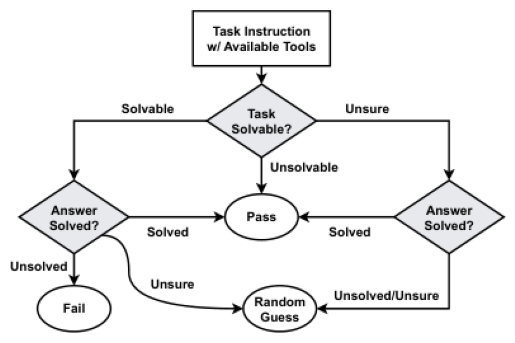

Task w/ Tools w/ Answer Unsolvable PassAnswer Solved?Task Solvable? Solved Unsolved/UnsureRandom GuessFailUnsure Answer Solved?Solvable Solved Unsolved UnsureFigure 2: Pass Rate evaluation in ToolBench paper. MethodTask AnswerPass WinS US UE S US UE CoT168 23 9 19 170 11 33.0 50.0 165 29 6 16 174 10 31.5 46.5 151 40 9 20 167 13 37.5 53.0 DFS116 68 16 17 167 16 50.5 54.0 122 59 19 20 162 18 46.5 48.0 132 54 14 22 157 21 55.0 56.0 Table 1: Experiments use GPT-3.5-Turbo-0613 with CoT and DFS. S, US, and UE indicate solvable (solved), unsolvable (unsolved), and unsure. Pass and Win de- note pass rate and win rate, respectively. Win rates are evaluated against the first run of CoT. This experiment is run on 4 Feb 2024. table decline in the performance of all methods over time, which raises concerns about the stability of ToolBench as a benchmark. 2.2 Stability of Evaluation In ToolBench, there are two types of metrics, in- cluding Pass Rate (PR) and Win Rate (WR). PR is calculated based on 

In [4]:
output = agent_executor.invoke({"input": "explain about the 'Figure 2: Pass Rate evaluation in ToolBench paper.' in the 3 page of the paper 'StableToolBench' 한글로 말해줘"})

In [6]:
pprint(output['output'])

("'ToolBench' 논문의 3페이지에 있는 'Figure 2: Pass Rate evaluation'에 대해 설명해 드리겠습니다.\n"
 '\n'
 "'Figure 2: Pass Rate evaluation'은 ToolBench 논문에서 Pass Rate(통과율)를 평가하는 그림입니다. "
 'Pass Rate(PR)는 gpt-3.5-turbo-16k를 사용하여 작업이 해결 가능한지 여부를 결정하고 생성된 답변이 해당 작업을 '
 '해결할 수 있는지에 따라 계산됩니다. 구체적으로, 해결 가능한 작업은 답변이 해결되면 통과로 간주되고, 해결되지 않으면 실패로 간주되며, '
 '불확실한 경우 무작위로 결정됩니다. 불확실로 판단된 작업의 경우 답변이 해결되면 통과로 간주되고, 그렇지 않으면 무작위 결과가 '
 '선택됩니다. 작업이 해결 불가능한 경우 답변 상태에 관계없이 통과로 간주됩니다.\n'
 '\n'
 '또한, Win Rate(WR)은 짝을 이룬 후보자들의 비교 PR에 기반하여 파생됩니다. 한 명이 통과하고 다른 한 명이 실패하는 경우, '
 '통과한 쪽이 이깁니다. 다른 상황에서는 gpt-3.5-turbo-16k를 사용하여 짝을 이룬 후보자들을 자동으로 평가합니다. 평가의 '
 '안정성을 평가하기 위해 CoT와 DFS를 사용하여 gpt-3.5-turbo-0613을 사용하여 수행합니다.')
